In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score

from wordcloud import WordCloud
from collections import Counter

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import warnings
import pandas as pd


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import numpy as np
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/NLP/jigsaw-toxic-comment-classification-challenge/train./train.csv")
test = pd.read_csv("/content/drive/MyDrive/NLP/jigsaw-toxic-comment-classification-challenge/test./test.csv")
train.head(10)

# https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
# Labels count 
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train[class_names].apply(lambda x: x.value_counts())

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,144277,157976,151122,159093,151694,158166
1,15294,1595,8449,478,7877,1405


In [ ]:
# Normalize
train[class_names].apply(lambda x: x.value_counts(normalize=True))

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.904156,0.990004,0.947052,0.997004,0.950636,0.991195
1,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805


In [ ]:
# Extract and combine all comments flagged as "Toxic
toxic_df = train[train["obscene"] == 1]
toxic_df = toxic_df["comment_text"].reset_index(drop=True)

toxic_text = ""

for i in range(len(toxic_df)):
    toxic_text += " " + toxic_df[i]
    
toxic_text[:100]

' COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK You are gay or antisemmitian? \n\nArchangel WHite Tiger\n'

In [ ]:
tokens = re.findall(r'\w+', toxic_text)
print("Number of toxic tokens = "+"{:,}\n".format(len(tokens)))
print(tokens[:50])

Number of toxic tokens = 438,746

['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK', 'You', 'are', 'gay', 'or', 'antisemmitian', 'Archangel', 'WHite', 'Tiger', 'Meow', 'Greetingshhh', 'Uh', 'there', 'are', 'two', 'ways', 'why', 'you', 'do', 'erased', 'my', 'comment', 'about', 'WW2', 'that', 'holocaust', 'was', 'brutally', 'slaying', 'of', 'Jews', 'and', 'not', 'gays', 'Gypsys', 'Slavs', 'anyone', '1', 'If', 'you', 'are', 'anti', 'semitian']


In [ ]:
# Remove stop words. Ex: silver or gold becomes: silver gold 

import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english') # All English Stopwords
#stop_words = set(stopwords.words('english'))

tokens = [t.lower() for t in tokens if t.lower() not in stop_words]
print(Counter(tokens).most_common(50))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('fuck', 9860), ('shit', 3212), ('fucking', 3192), ('suck', 3021), ('ass', 2846), ('nigger', 2727), ('u', 2310), ('go', 2147), ('wikipedia', 1905), ('bitch', 1795), ('like', 1541), ('cunt', 1530), ('get', 1407), ('fat', 1282), ('dick', 1257), ('faggot', 1223), ('know', 1178), ('die', 1173), ('bullshit', 1086), ('page', 1082), ('penis', 1076), ('sucks', 1068), ('asshole', 1007), ('stupid', 953), ('cock', 924), ('hate', 835), ('people', 824), ('nipple', 824), ('one', 727), ('fucker', 726), ('dickhead', 711), ('article', 690), ('user', 690), ('bastard', 690), ('eat', 683), ('piece', 682), ('talk', 681), ('jew', 675), ('faggots', 669), ('block', 654), ('stop', 645), ('want', 641), ('idiot', 633), ('fucksex', 624), ('yourselfgo', 621), ('life', 620), ('think', 617), ('wiki', 616), ('freedom', 601), ('damn', 600)]


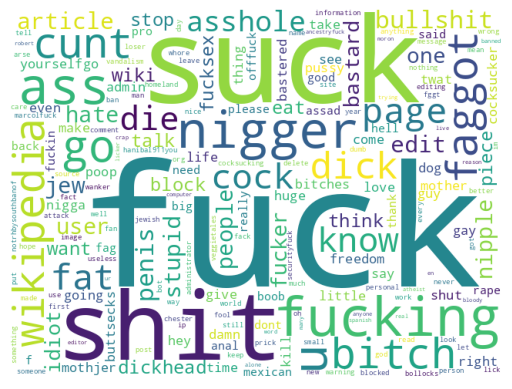

In [ ]:
text_wordcloud = " ".join(tokens)
cloud = WordCloud(background_color="white", width=640, height=480, collocations = False).generate(text_wordcloud)

plt.imshow(cloud)
plt.axis("off")
plt.show()

In [ ]:
s_toxic_df = train[train["severe_toxic"] == 1]
s_toxic_df = s_toxic_df["comment_text"].reset_index(drop=True)
s_toxic_text = ""
for i in range(len(toxic_df)):
    s_toxic_text += " " + toxic_df[i]
    
some_frac_total_text = toxic_text + s_toxic_text 
print("Characters = "+"{:,}".format(len(some_frac_total_text)))
print("Words = "+"{:,}".format(len(some_frac_total_text.split())))
print("Unique words from first two = "+"{:,}".format(len(set(some_frac_total_text.split()))))

Characters = 4,862,988
Words = 837,474
Unique words from first two = 44,430


In [ ]:
# combine all the text in training and test set
train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text])
all_text.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [ ]:

# To simplify our tasks, we will use TfidfVectorizer which is equivalent to CountVectorizer 
# followed by TfidfTransformer to convert a collection of text comments to a matrix of TF-IDF 
# features.
# learn vocabulary and idf from all the text data 
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)

word_vectorizer.fit(all_text)
# # default:  ngram_range=(1, 1)
# Recall that ngram is basically "I am good" is 3-gram with two 2-gram "I am" and "am good"

TfidfVectorizer(max_features=10000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [ ]:
# transform words to document-term matrix
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)

In [ ]:
 #@title Logistic Regression
# from sklearn.model_selection import cross_val_score
# scores = []
# submission = pd.DataFrame.from_dict({'id': test['id']})
# for class_name in class_names: # We have six of these
#     train_target = train[class_name]
#     classifier = LogisticRegression(C=1, solver='sag')

#     cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
#     scores.append(cv_score)
#     print('CV score for class {} is {}'.format(class_name, cv_score))

#     classifier.fit(train_features, train_target)
#     submission[class_name] = classifier.predict_proba(test_features)[:, 1]
    

# print('Total CV score is {}'.format(np.mean(scores)))

# # submission.to_csv('submission.csv', index=False)

In [ ]:
#@title LSTM

train.drop('id', axis=1, inplace=True)

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
bigX = train.drop(labels,axis=1)
bigX = bigX.to_numpy().reshape(-1,) # It has only comment_text
bigy = train[labels].to_numpy()
bigX.shape, bigy.shape

((159571,), (159571, 6))

In [ ]:
from sklearn.model_selection import train_test_split
X_train_dev, X_test, y_train_dev, y_test = train_test_split(bigX, bigy,
                                                    test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X_train_dev, y_train_dev,
                                                    test_size=0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
max_words = 2000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(bigX)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix_train = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences,maxlen=max_len)
# sequences = tok.texts_to_sequences(X_val)
# sequences_matrix_val = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(bigX)
sequences_matrix_big = pad_sequences(sequences,maxlen=max_len)

In [ ]:
# Define the model architecture
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Embedding

# embed_dim = 128
# lstm_out = 196
# max_features=2000

# model = models.Sequential()
# model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(6, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# batch_size = 32
# epochs = 2

# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
# from tensorflow.keras import models
# from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.8))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.summary()

model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 147,622
Trainable params: 147,622
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# def build_model(embedding_matrix):
#     """
#     Build the LSTM model.
    
#     :param embedding_matrix: a matrix with the corresponding embedding of all words.
#     :return: the created LSTM model.
#     """
#     # Input layer.
#     inp = tf.keras.layers.Input(shape=(MAX_LEN,), name="input")

#     # Add embedding layer.
#     x = tf.keras.layers.Embedding(vocab_size, WORD_VEC_SIZE, 
#                                   weights=[embedding_matrix], 
#                                   trainable=False)(inp)

#     # Add LSTM layer.
#     x = tf.keras.layers.LSTM(128)(x)

#     # Output layer.
#     x = tf.keras.layers.Dense(6, activation='softmax', name="output")(x)
    
#     model = tf.keras.models.Model(inputs=inp, outputs=x)
    
#     model.compile(loss='binary_crossentropy', 
#                   optimizer='rmsprop', 
#                   metrics=['acc'])
                  
#     return model
#     model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(sequences_matrix_train,
                    y_train,
                    epochs=1,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val))

NameError: ignored

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

In [ ]:
model.evaluate(sequences_matrix_test, y_val)

In [ ]:
# id_col = test['id']
# test = test.drop('id', axis=1).to_numpy().reshape(-1,)
# sequences = tok.texts_to_sequences(test)
# sequences_matrix_test_final = pad_sequences(sequences,maxlen=max_len)
# y_pred = model.predict(sequences_matrix_test_final)

In [ ]:
# prediction_df = pd.DataFrame()
# input_text = "there there see"
# prediction_df['input_text'] = id_col
# prediction_df[labels] = y_pred
# prediction_df

In [ ]:
!pip install gradio jinja2
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
# Set the maximum sequence length and the maximum number of words to keep
maxlen = 200
num_words = 10000

# input_str = 'you freaky fucking gay'
input_str = 'good morning'

# Initialize the tokenizer with the specified parameters
tok = Tokenizer(num_words=num_words)
tok.fit_on_texts(input_str)

# Convert the input sequence to a padded sequence of integers
input_seq = tok.texts_to_sequences([input_str])[0]
input_seq = pad_sequences([input_seq], maxlen=maxlen)

# Call the predict method with the padded sequence
res = model.predict(input_seq)
print(res)
result = (res > 0.5).astype(int)
print(result)
res
# ray([[0.49650607, 0.49893817, 0.49706796, 0.500564  , 0.50055283,
        # 0.4979591 ]], dtype=float32)

In [ ]:


def score_comment(comment):
    vectorized_comment = tokenizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.05)
    
    return text


interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

interface.launch(share=True)